# FACxTMS_2F (single spacecraft)

> Abstract: Access to the field aligned currents evaluated by the single satellite method (level 2 product). We show simple line plots of the time series over short periods (minutes), from both Swarm Alpha and Charlie. We also compare with the alternative method whereby the FACs are evaluated locally by computing them from the magnetic field data (`B_NEC` from `MAGx_LR_1B`).

Documentation:

- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#FACxTMS_2F
- https://earth.esa.int/documents/10174/1514862/Swarm_L2_FAC_single_product_description

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

request = SwarmRequest()

## Check what "FAC" data variables are available

NB: these are the same as in the `FAC_TMS_2F` dual-satellite FAC product

In [3]:
request.available_collections("FAC", details=False)

{'FAC': ['SW_OPER_FACATMS_2F',
  'SW_OPER_FACBTMS_2F',
  'SW_OPER_FACCTMS_2F',
  'SW_OPER_FAC_TMS_2F']}

In [4]:
request.available_measurements("FAC")

['IRC',
 'IRC_Error',
 'FAC',
 'FAC_Error',
 'Flags',
 'Flags_F',
 'Flags_B',
 'Flags_q']

## Plotting as a time series

### Fetch one day from Swarm Alpha and Charlie

Also fetch the quasidipole (QD) coordinates and Orbit Number at the same time.

In [5]:
request.set_collection("SW_OPER_FACATMS_2F", "SW_OPER_FACCTMS_2F")
request.set_products(
    measurements=["FAC", "FAC_Error", 
                  "Flags", "Flags_F", "Flags_B", "Flags_q"],
    auxiliaries=["QDLat", "QDLon", "OrbitNumber"],
)
data = request.get_between(
    dt.datetime(2014,4,20),
    dt.datetime(2014,4,21)
)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (14.696MB)

The source files of the original data are listed

In [6]:
data.sources

['SW_OPER_AUXAORBCNT_20131122T132146_20240125T225347_0001',
 'SW_OPER_AUXCORBCNT_20131122T132146_20240125T225340_0001',
 'SW_OPER_FACATMS_2F_20140420T000000_20140420T235959_0401',
 'SW_OPER_FACCTMS_2F_20140420T000000_20140420T235959_0401']

The data can be loaded as a pandas dataframe

In [7]:
df = data.as_dataframe()
df = df.sort_index()
df.head()

Latitude      QDLat       Radius  FAC_Error  \
Timestamp                                                               
2014-04-20 00:00:00.500 -26.849185 -36.222500  6851356.835   0.065509   
2014-04-20 00:00:00.500 -26.285007 -35.770004  6851317.060   0.062153   
2014-04-20 00:00:01.500 -26.221325 -35.718651  6851310.440   0.065763   
2014-04-20 00:00:01.500 -26.785506 -36.172028  6851350.325   0.065887   
2014-04-20 00:00:02.500 -26.721826 -36.121506  6851343.805   0.066541   

                         Flags_F Spacecraft  Flags_B      QDLon       FAC  \
Timestamp                                                                   
2014-04-20 00:00:00.500        2          A        0  87.677834  0.004292   
2014-04-20 00:00:00.500        2          C        0  89.366638 -0.020003   
2014-04-20 00:00:01.500        2          C        0  89.390350  0.003943   
2014-04-20 00:00:01.500        2          A        0  87.701981  0.006710   
2014-04-20 00:00:02.500        2          A        0  87.726082  0.010963   

                         OrbitNumber  Flags  Flags_q  Longitude  
Timestamp                                                        
2014-04-20 00:00:00.500         2267      0        0  19.102806  
2014-04-20 00:00:00.500         2263      0        0  20.535146  
2014-04-20 00:00:01.500         2263      0        0  20.534623  
2014-04-20 00:00:01.500         2267      0        0  19.102319  
2014-04-20 00:00:02.500         2267      0        0  19.101828

Alternatively we can load the data as an xarray Dataset, though in the following examples we use the data via a pandas DataFrame instead

In [8]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:      (Timestamp: 172800)
Coordinates:
  * Timestamp    (Timestamp) datetime64[ns] 2014-04-20T00:00:00.500000 ... 20...
Data variables: (12/13)
    Spacecraft   (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'C' 'C' 'C' 'C' 'C'
    Latitude     (Timestamp) float64 -26.85 -26.79 -26.72 ... 87.31 87.33 87.33
    Flags        (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    QDLat        (Timestamp) float64 -36.22 -36.17 -36.12 ... 81.26 81.27 81.28
    Radius       (Timestamp) float64 6.851e+06 6.851e+06 ... 6.835e+06 6.835e+06
    FAC_Error    (Timestamp) float64 0.06551 0.06589 0.06654 ... 0.04353 0.05464
    ...           ...
    Flags_B      (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    QDLon        (Timestamp) float64 87.68 87.7 87.73 ... 171.9 172.4 172.8
    FAC          (Timestamp) float64 0.004292 0.00671 ... 0.09216 0.01805
    OrbitNumber  (Timestamp) int32 2267 2267 2267 2267 ... 2279 2279 2279 2279
    Longitude    (Timestamp) float64 19.1 19.1 19.1 19.1 ... 100.6 102.0 103.3
    Flags_q      (Timestamp) uint32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    Sources:         ['SW_OPER_AUXAORBCNT_20131122T132146_20240125T225347_000...
    MagneticModels:  []
    AppliedFilters:  []

Depending on your application, you should probably do some filtering according to each of the flags. This can be done on the dataframe here, or beforehand on the server using [`request.set_range_filter()`](https://viresclient.readthedocs.io/en/latest/api.html#viresclient.SwarmRequest.set_range_filter). See https://earth.esa.int/documents/10174/1514862/Swarm_L2_FAC_single_product_description for more about the data

### Plot the time series (FAC and FAC_Error for Alpha)

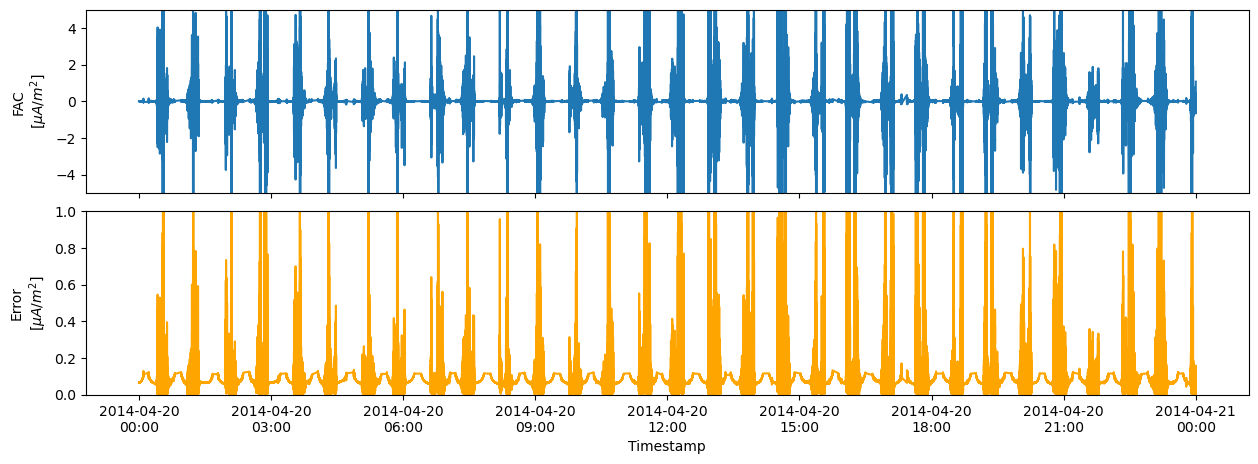

In [9]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5))
# Select out the time series from Swarm Alpha
dfA = df.where(df["Spacecraft"] == "A").dropna()
axes[0].plot(dfA.index, dfA["FAC"])
axes[1].plot(dfA.index, dfA["FAC_Error"], color="orange")
axes[0].set_ylabel("FAC\n[$\mu A / m^2$]");
axes[1].set_ylabel("Error\n[$\mu A / m^2$]");
axes[1].set_xlabel("Timestamp");
date_format = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
axes[1].xaxis.set_major_formatter(date_format)
axes[0].set_ylim(-5, 5);
axes[1].set_ylim(0, 1);
axes[0].set_xticklabels([])
fig.subplots_adjust(hspace=0.1)

### Plot a subset of the time series (FAC from Alpha and Charlie)

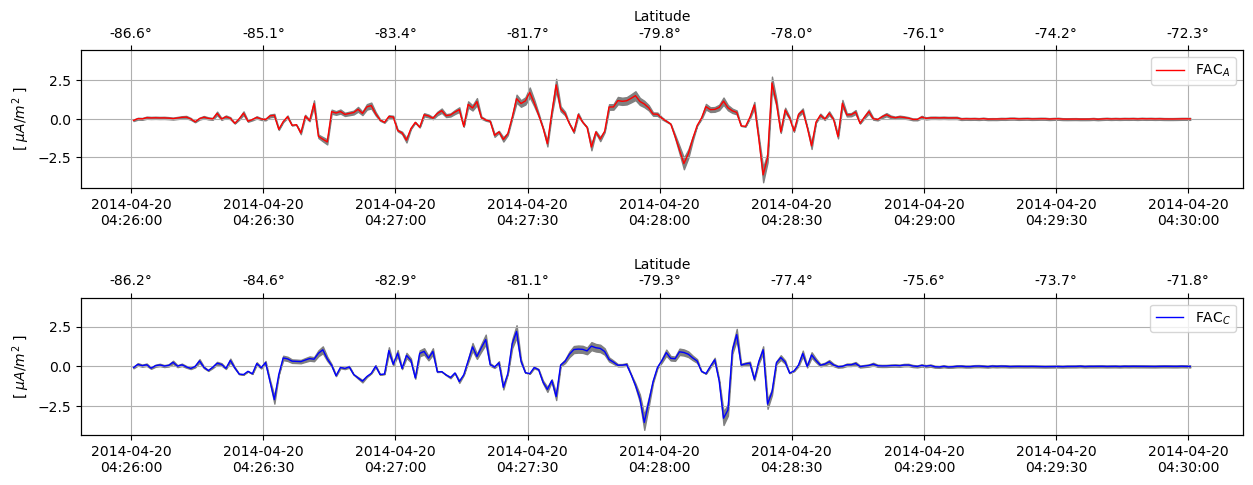

In [10]:
def line_plot(fig, ax, df, varname="FAC", spacecraft="A", color="red"):
    """Plot FAC as a line, given a dataframe"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    ax.plot(df.index, df[varname], linewidth=1,
            label=f"{varname}$_{spacecraft}$", color=color)
    # Plot error range as filled area
    if varname == "FAC":
        ax.fill_between(df.index, 
                        df["FAC"] - df["FAC_Error"],
                        df["FAC"] + df["FAC_Error"], color="grey")
    # Adjust limits and label formatting
    datetime_format = "%Y-%m-%d\n%H:%M:%S"
    xlabel_format = mdates.DateFormatter(datetime_format)
    ax.xaxis.set_major_formatter(xlabel_format)
    ax.set_ylabel("[ $\mu A / m^2$ ]")
    # Make y-axis symmetric about zero
    ylim = max(abs(y) for y in ax.get_ylim())
    ax.set_ylim((-ylim, ylim))
    ax.legend()
    ax.grid(True)
    # Set up an extra xaxis at the top, to display Latitude
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    # Identify closest times in dataframe to use for Latitude labels
    # NB need to draw the figure now in order to get the xticklabels
    #  https://stackoverflow.com/a/41124884
    fig.canvas.draw()
    # Extract times from the lower x axis
    # Use them to find the nearest Lat values in the dataframe
    xtick_times = [dt.datetime.strptime(ts.get_text(), datetime_format) for ts in ax.get_xticklabels()]
    ilocs = [df.index.get_indexer([t], method="nearest")[0] for t in xtick_times]
    lats = df.iloc[ilocs]["Latitude"]
    lat_labels = ["{}°".format(s) for s in np.round(lats.values, decimals=1)]
    ax2.set_xticklabels(lat_labels)
    ax2.set_xlabel("Latitude")

# Easy pandas-style slicing of the dataframe
df_subset = df['2014-04-20T04:26:00':'2014-04-20T04:30:00']
fig, axes = plt.subplots(nrows=2, figsize=(15, 5))
line_plot(fig, axes[0], df_subset, spacecraft="A", color="red")
line_plot(fig, axes[1], df_subset, spacecraft="C", color="blue")
fig.subplots_adjust(hspace=0.8)

FAC estimates from (top) Swarm Alpha and (bottom) Swarm Charlie. The error estimate is shown as a thin grey area

### Also show satellite location on a map

/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


/opt/conda/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


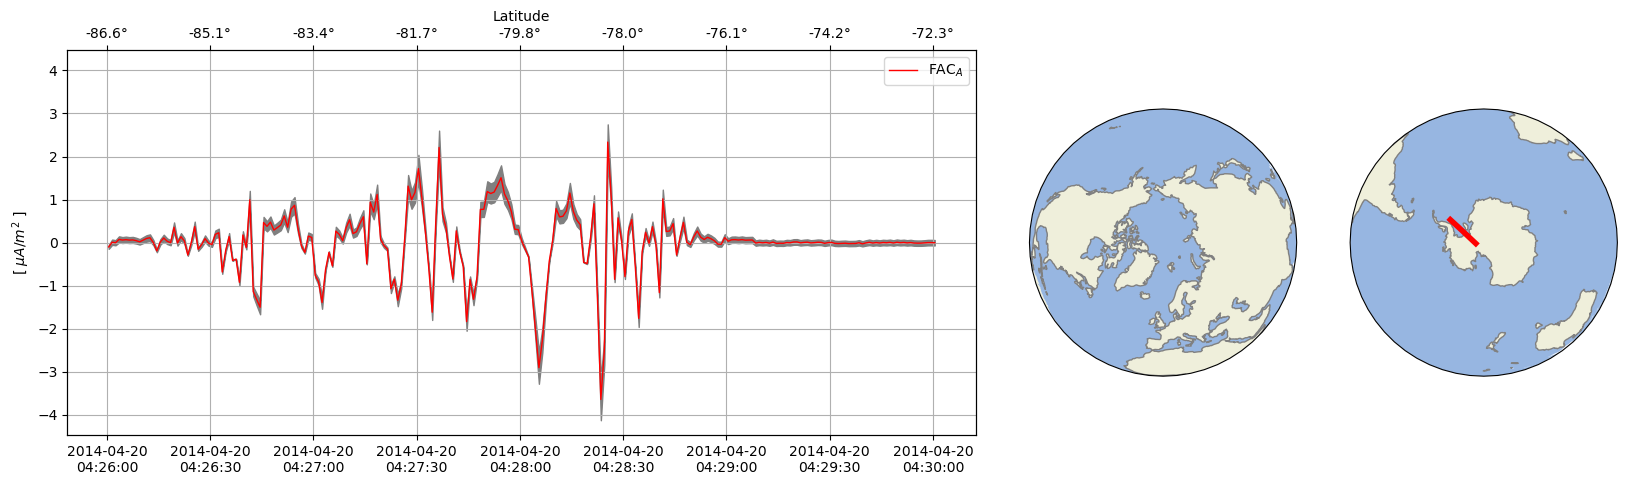

In [11]:
def line_plot_figure(df, spacecraft="A", color="red"):
    """Generate a figure containing both line plot and maps"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    # Set up figure geometry together with North/South maps
    fig = plt.figure(figsize=(20, 5))
    ax_lineplot = plt.subplot2grid((1, 5), (0, 0), colspan=3, fig=fig)
    ax_N = plt.subplot2grid((1, 5), (0, 3), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=90.0
        ))
    ax_S = plt.subplot2grid((1, 5), (0, 4), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=-90.0
        ))
    for _ax in (ax_N, ax_S):
        _ax.set_global()
        _ax.coastlines(color="grey")
        _ax.add_feature(cfeature.LAND)
        _ax.add_feature(cfeature.OCEAN)
        _ax.plot(df["Longitude"], df["Latitude"], transform=ccrs.PlateCarree(),
                 linewidth=4, color=color)
    # Draw the line plot as before
    line_plot(fig, ax_lineplot, df, spacecraft=spacecraft, color=color)

line_plot_figure(df_subset, spacecraft="A", color="red")